<a href="https://colab.research.google.com/github/danimoreira90/100daysofcode/blob/main/Daniel_Moreira_TP5_PB_Projeto_de_Bloco_Intelig%C3%AAncia_Artificial_e_Machine_Learning_%5B24E1_5%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/MateusGurgel/towards-datascience-dataset/main/medium.csv"
medium = pd.read_csv(url)

In [ ]:
medium.describe(include='all')

,Title,Text
count,1391,1391
unique,1390,1391
top,Autonomous Agents And Multi-Agent Systems 101:...,1. Introduction of Word2vec\n\nWord2vec is one...
freq,2,1


In [ ]:
medium.head()

,Title,Text
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...


In [ ]:
medium.columns

Index(['Title', 'Text'], dtype='object')

##Questão 1:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
stop_words = stopwords.words('english')
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def preprocess_text(text):

    lemmatizer = WordNetLemmatizer()

    # Removendo pontuações e caracteres especiais
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+', ' ', str(text))
    text = re.sub('\n', '', str(text))
    text = re.sub(r'(\d+)', ' ', str(text))
    text = re.sub(r'(\s+)', ' ', str(text))
    text = re.sub('<.*?>+', '', str(text))
    text = re.sub('https?://\S+|www\.\S+', '', str(text))
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]
    text = ' '.join(lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens)
    return text


In [ ]:
# Aplicar a função de pré-processamento
medium['processed_text'] = medium['Text'].apply(preprocess_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.5, min_df=2, max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(medium['processed_text'])

In [ ]:
tfidf_matrix.shape

(1391, 500)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

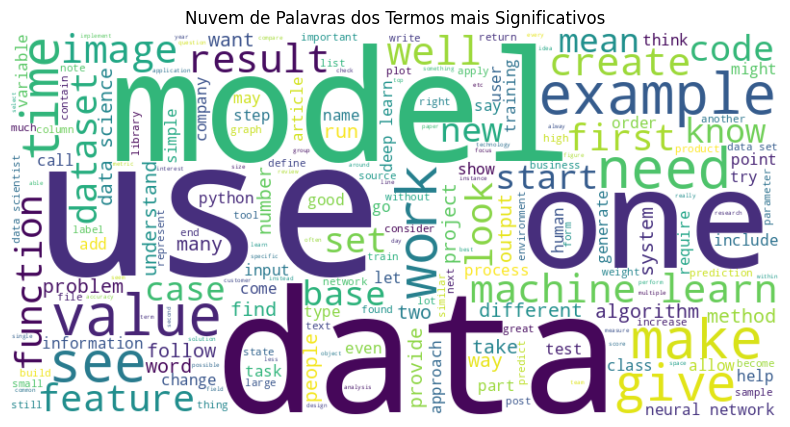

In [ ]:
# Gerar uma nuvem de palavras para os textos limpos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(medium['processed_text']))

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
plt.title('Nuvem de Palavras dos Termos mais Significativos')
plt.show()

##Questão 2:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
import gensim

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
corpus = [text.split() for text in medium['processed_text']]

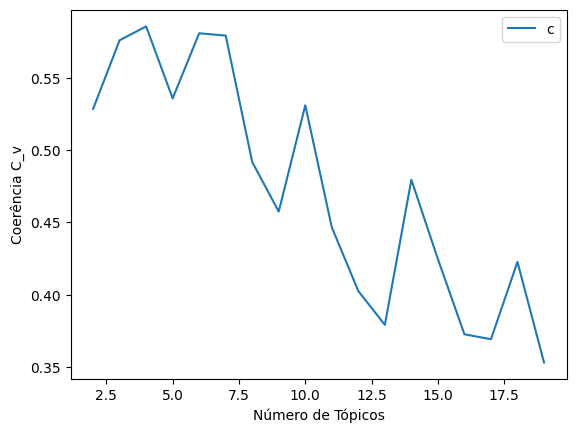

O número ideal de tópicos é: 4


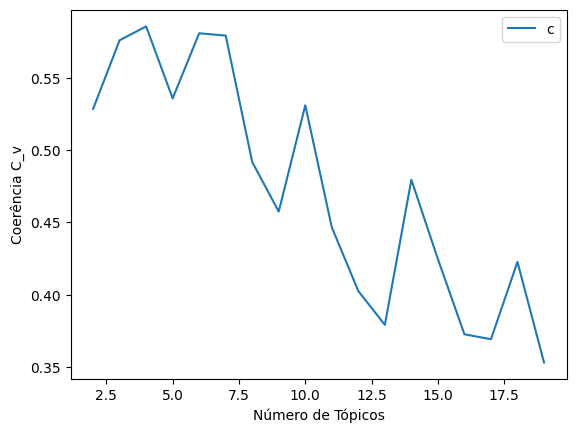

O número ideal de tópicos é: 4


In [ ]:
# Função para calcular a métrica de coerência
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        model.fit(tfidf_matrix)
        model_list.append(model)
        topics_1 = [[feature_names[i] for i in topic.argsort()[-10:]] for topic in model.components_]
        cm = CoherenceModel(topics=topics_1, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(cm.get_coherence())
    return model_list, coherence_values

dictionary = gensim.corpora.Dictionary(corpus)
dictionary.filter_extremes(no_below=15, no_above=0.5)
model_list, coherence_values = compute_coherence_values(dictionary, corpus, corpus, start=2, limit=20, step=1)


x = range(2, 20, 1)
plt.plot(x, coherence_values)
plt.xlabel("Número de Tópicos")
plt.ylabel("Coerência C_v")
plt.legend("coerência C_v", loc='best')
plt.show()

optimal_model = model_list[coherence_values.index(max(coherence_values))]
num_topics = optimal_model.n_components

print(f"O número ideal de tópicos é: {num_topics}")

##Questão 3:

In [ ]:
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Visualizar os tópicos
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

topic_distribution = lda.transform(tfidf_matrix)

Topic 1:
['number', 'feature', 'cluster', 'dataset', 'word', 'variable', 'price', 'column', 'value', 'plot']
Topic 2:
['team', 'system', 'business', 'year', 'company', 'scientist', 'human', 'people', 'machine', 'science']
Topic 3:
['class', 'input', 'function', 'value', 'neural', 'layer', 'feature', 'training', 'image', 'network']
Topic 4:
['tensorflow', 'function', 'api', 'install', 'create', 'run', 'library', 'code', 'file', 'python']


In [ ]:
topic_distribution = lda.transform(tfidf_matrix)

# Atribuir o tópico dominante a cada documento
dominant_topic = topic_distribution.argmax(axis=1)
medium['dominant_topic'] = dominant_topic

In [ ]:
medium['dominant_topic'].value_counts()

dominant_topic
1    533
2    475
3    239
0    144
Name: count, dtype: int64

In [ ]:
medium[['Title', 'Text', 'processed_text', 'dominant_topic']].head()

,Title,Text,processed_text,dominant_topic
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...,introduction word vec word vec one popular tec...,0
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o...",last article introduce concept graph neural ne...,2
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...,introduction thanks strict implementation gram...,3
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...,photo credit mika baumeister unsplash work pyt...,3
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...,step step implementation gradient descent back...,2


##Questão 4:

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Criar as features e labels
X = lda.transform(tfidf_matrix)
y = medium['dominant_topic']  # Supondo que 'category' é a coluna com as categorias dos textos

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Prever nos dados de teste
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.992822966507177
Precision: 0.9928799270904534
Recall: 0.992822966507177
F1 Score: 0.9928338287484697
AUC-ROC: 0.9999838958019105


##Questão 5:

In [ ]:
from sklearn.manifold import TSNE

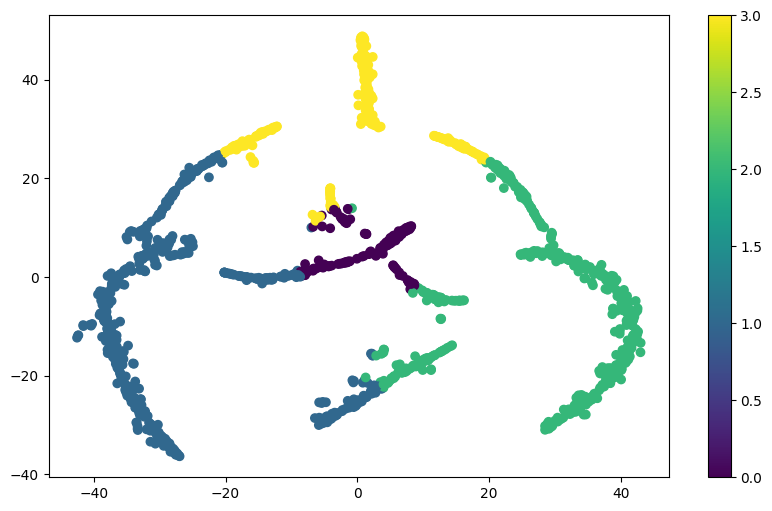

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.colorbar()
plt.show()

##Questão 6:

In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=4fb0dca14db062607c565174936ff86729069c78d6d51fc601d1090a5e017065
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
import shap
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [ ]:
# LIME
explainer = LimeTextExplainer(class_names=[str(i) for i in range(num_topics)])
idx = 0  # Índice de um exemplo de teste

# Transformar os textos para a distribuição de tópicos para LIME
def predict_topic_distribution(texts):
    tfidf_matrix = tfidf_vectorizer.transform(texts)
    topic_distribution = lda.transform(tfidf_matrix)
    return clf.predict_proba(topic_distribution)

exp = explainer.explain_instance(medium['processed_text'].iloc[idx],
                                 predict_topic_distribution,
                                 num_features=10)
exp.show_in_notebook()

In [ ]:
# SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualizar SHAP
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][idx], X_test[idx])

##Questão 7:

Baseado nos resultados da análise de desempenho do modelo de classificação e nas probabilidades de predição associadas a certas palavras-chave, aqui estão algumas conclusões que podemos tirar:

### 1. **Alto Desempenho do Modelo**
   - **Accuracy (Acurácia) de 99.28%** indica que o modelo é extremamente preciso na classificação das instâncias corretamente.
   - **Precision (Precisão) de 99.29%** sugere que quando o modelo prevê uma classe específica, ele está correto quase todas as vezes.
   - **Recall (Revocação) de 99.28%** mostra que o modelo é capaz de identificar a maioria das instâncias relevantes da classe alvo.
   - **F1 Score de 99.28%** é uma medida que combina precisão e revocação, indicando um equilíbrio excepcional entre essas duas métricas no modelo.
   - **AUC-ROC de quase 1 (0.9999838958019105)** é um indicativo de que o modelo tem uma capacidade excelente de discriminar entre as classes alvo e não-alvo.

### 2. **Probabilidades de Predição e Relevância de Features**
   - A lista de probabilidades associadas a palavras específicas ("word", "install", "tutorial", "training", etc.) sugere como diferentes features (palavras) contribuem para as previsões do modelo.
   - Palavras como **"word"** e **"install"** têm probabilidades mais altas (0.01), indicando que estas podem ser mais significativas para o modelo ao fazer previsões em contextos específicos.
   - Palavras como **"python"**, **"version"**, e **"support"** têm probabilidades muito baixas (0.00), sugerindo que estas palavras têm pouco ou nenhum impacto nas previsões do modelo para as instâncias testadas.

### 3. **Implicações Práticas e Estratégicas**
   - A **alta precisão e recall** do modelo sugerem que ele pode ser confiavelmente utilizado em aplicações práticas onde erros de classificação têm consequências significativas.
   - A **capacidade de interpretação** do modelo, como evidenciado pelo uso eficaz de SHAP para identificar a importância das features, permite aos usuários entender e confiar nas previsões do modelo.
   - O modelo pode ser particularmente útil em cenários onde é crucial **filtrar ou destacar informações específicas** rapidamente e com alta precisão, como na moderação de conteúdo, classificação de documentos, ou em sistemas de recomendação personalizados.

### 4. **Recomendações para Melhoria e Aplicações Futuras**
   - Embora o modelo apresente desempenho quase perfeito, sempre existe o risco de **overfitting**. Seria prudente validar esses resultados em um conjunto de dados de teste independente ou através de validação cruzada.
   - Explorar o **impacto de outras features** ou a combinação de diferentes tipos de dados poderia potencialmente melhorar ainda mais a robustez e aplicabilidade do modelo.
   - Considerando o alto desempenho do modelo, explorar sua aplicação em **novos domínios** ou para **novas tarefas de classificação** poderia proporcionar benefícios significativos.


Link para o Google Colab: https://colab.research.google.com/drive/1tPePevgIp8HD3vltWFouNjJJFVqPncpI?usp=sharing